# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


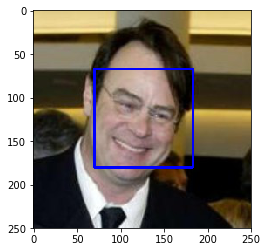

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
totalHumFaces = 0
for humfile in human_files_short:
    if(face_detector(humfile)):
        totalHumFaces = totalHumFaces +1

print("Percentage of Human faces detected :",totalHumFaces/len(human_files_short)*100)        
        
        
totalDogFaces = 0
for dogfile in dog_files_short:
    if(face_detector(dogfile)):
        totalDogFaces = totalDogFaces +1
        
print("Percentage of Dog faces detected :",totalDogFaces/len(dog_files_short)*100)        
        

Percentage of Human faces detected : 98.0
Percentage of Dog faces detected : 17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 108707158.60it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    input_image = Image.open(img_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    if use_cuda:
        input_batch = input_batch.cuda()
    output = VGG16(input_batch)    
    #print(output)
    #print(output[0])
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    probabilities = probabilities.cpu()
    probabilities = probabilities.detach().numpy()
    ind = np.argmax(probabilities)
    #return probabilities # predicted class index
    return ind

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    detIndex = VGG16_predict(img_path)
    print('detected index :',detIndex)
    if(151<=detIndex<=268):
        return True
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1 percentage of human faces are detected using the dog detector
100 percentage of dogs are detected using the dog detector


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
totalHumFaces = 0
for humfile in human_files_short:
    if(dog_detector(humfile)):
        totalHumFaces = totalHumFaces +1

print("Percentage of Human faces detected :",totalHumFaces/len(human_files_short)*100)        
        
totalDogFaces = 0
for dogfile in dog_files_short:
    if(dog_detector(dogfile)):
        totalDogFaces = totalDogFaces +1
        
print("Percentage of Dog faces detected :",totalDogFaces/len(dog_files_short)*100)  

detected index : 906
detected index : 456
detected index : 834
detected index : 834
detected index : 862
detected index : 457
detected index : 834
detected index : 400
detected index : 834
detected index : 906
detected index : 834
detected index : 906
detected index : 683
detected index : 906
detected index : 819
detected index : 617
detected index : 0
detected index : 543
detected index : 678
detected index : 617
detected index : 689
detected index : 432
detected index : 441
detected index : 862
detected index : 617
detected index : 834
detected index : 513
detected index : 917
detected index : 906
detected index : 834
detected index : 854
detected index : 683
detected index : 678
detected index : 889
detected index : 906
detected index : 834
detected index : 903
detected index : 834
detected index : 906
detected index : 906
detected index : 445
detected index : 585
detected index : 678
detected index : 834
detected index : 432
detected index : 445
detected index : 903
detected index 

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size=64
num_workers = 0

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [13]:
standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

In [14]:
data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'val': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }

In [15]:
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

In [16]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
*. The code resizes the images to 224*224 by center cropping the images. This is the default in most of the pretrained models. This size is not too small not big for processing and training the model. Hence choosen this size.
*. Data is augmented with random horizontal flip of images in train set. 

In [17]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        return x

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn
import torch.nn.functional as F
import torch

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, 133) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)   # 32 * 56 * 56
        x = F.relu(self.conv2(x)) 
        x = self.pool(x)    # 64 * 14 * 14
        x = F.relu(self.conv3(x))
        x = self.pool(x)     # 128 * 7 * 7
        # flatten
        #x = x.view(-1, 7*7*128)
        x = Flatten().forward(x)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc1(y))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The input dimensions of the images are (224,224,3). 3 is the number of channels.

model print out for reference:
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)

First Conv layer has 3 input channels and 32 output features maps. kernel size is 3 and stride is 2, padding is 1.
After the conv2d layer there is a maxpool layer of size (2,2). This is used to reduce the dimensions of the image. 
Dimension output is reduced to 56*56 

Second Conv layer has 32 input channels and 64 output features maps. kernel size is 3 and stride is 2, padding is 1.
After the conv2d layer there is a maxpool layer of size (2,2). This is used to reduce the dimensions of the image. 
Dimension output is reduced to 14*14 

Third Conv layer has 64 input channels and 128 output features maps. kernel size is 3 and stride is 1, padding is 1.
After the conv2d layer there is a maxpool layer of size (2,2). This is used to reduce the dimensions of the image. 
Dimension output is reduced to 7*7 

This output is flattened and passed through dropout layer which is used to reduce the overfitting by zeroing some proportion of neurons in the network
Then it is passed to linear layer. The input size of the layer is 128*7*7. Output feature size is 500

The output is again passed through a dropout layer which reduces overfitting. 
Second linear layer input features are 500 and output is 133. 

Relu activation function is used for all layers.
        

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim
import torch.nn as nn
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            optimizer.zero_grad()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            output = model(data)
            loss = criterion_scratch(output,target)
            loss.backward()
            optimizer.step()
            #train_loss += loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion_scratch(output,target)
            #valid_loss += loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        # print training/validation statistics 
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            #Saving the model
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.879623
Epoch 1, Batch 101 loss: 4.827057
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.493241
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.483706
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.425866
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.449591
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.477707
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.490379
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.491152
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.527924
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.544061
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.554269
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.586695
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.594761
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.617637
Epoch: 1 	Training Loss: 4.822447 	Validation Loss: 4.641792
Validation loss decreased (inf --> 4.641792).  Saving model ...
Epoch 2, Batch 1

Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.685234
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.674564
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.714251
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.721980
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.721907
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.737381
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.755128
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.784866
Epoch: 9 	Training Loss: 3.950878 	Validation Loss: 3.838249
Validation loss decreased (3.887168 --> 3.838249).  Saving model ...
Epoch 10, Batch 1 loss: 3.801461
Epoch 10, Batch 101 loss: 3.882008
Epoch: 10 	Training Loss: 3.879046 	Validation Loss: 3.730188
Epoch: 10 	Training Loss: 3.879046 	Validation Loss: 3.719911
Epoch: 10 	Training Loss: 3.879046 	Validation Loss: 3.488746
Epoch: 10 	Training Loss: 3.879046 	Validation Loss: 3.495108
Epoch: 10 	Training Loss: 3.879046 	Validation Loss: 3.597232
Epoc

Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.361094
Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.387480
Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.422766
Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.432826
Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.462087
Epoch: 17 	Training Loss: 3.537520 	Validation Loss: 3.497589
Validation loss decreased (3.541520 --> 3.497589).  Saving model ...
Epoch 18, Batch 1 loss: 3.688627
Epoch 18, Batch 101 loss: 3.513136
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.291235
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.350344
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.251937
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.247795
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.335814
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.405232
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.368147
Epoch: 18 	Training Loss: 3.514955 	Validation Loss: 3.38

In [21]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.608982


Test Accuracy: 17% (144/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet18(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer    

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 101567111.14it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [25]:
numflt = model_transfer.fc.in_features
numflt

512

In [26]:
model_transfer.fc.out_features

1000

In [27]:
for param in model_transfer.parameters():
    param.requires_grad = False

In [28]:
model_transfer.fc = nn.Linear(numflt,133)
model_transfer.fc.requires_grad = True
model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
For transfer learning I have used ResNet-18. ResNet-18 is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database.
Resnet-18 is used for the transfer learning task here. We use the pretrained model and choose the last layer alone for training. It is modified to output 133 outputs and trained again on our dataset. 
Because of the depth of the network present in this model and also the vast image dataset it is pretrained on. This is suitable for out task.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [29]:
criterion_transfer = nn.CrossEntropyLoss()
params_to_update = []
for name, param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
optimizer_transfer = optim.Adam(params_to_update, lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# train the model
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

#checkpoint = torch.load('model_transfer.pt')
#model_transfer.load_state_dict(checkpoint['net'], False)
#model_transfer.cuda()

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1, Batch 1 loss: 5.183271
Epoch 1, Batch 101 loss: 3.539826
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.643734
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.794274
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.695397
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.690633
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.701488
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.725856
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.721407
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.766060
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.779475
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.746963
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.803173
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.826568
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.864981
Epoch: 1 	Training Loss: 3.493765 	Validation Loss: 1.886324
Validation loss decreased (inf --> 1.886324).  Saving model ...
Epoch 2, Batch 1

Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.493991
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.491737
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.503139
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.535598
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.544199
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.524465
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.559968
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.555112
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.564911
Epoch: 9 	Training Loss: 0.896789 	Validation Loss: 0.572963
Epoch 10, Batch 1 loss: 0.932883
Epoch 10, Batch 101 loss: 0.833436
Epoch: 10 	Training Loss: 0.838998 	Validation Loss: 0.425242
Epoch: 10 	Training Loss: 0.838998 	Validation Loss: 0.455341
Epoch: 10 	Training Loss: 0.838998 	Validation Loss: 0.408877
Epoch: 10 	Training Loss: 0.838998 	Validation Loss: 0.444929
Epoch: 10 	Training Loss: 0.838998 	Validation Loss: 0.487225
Epoch: 10 	T

Epoch: 17 	Training Loss: 0.736212 	Validation Loss: 0.492008
Epoch: 17 	Training Loss: 0.736212 	Validation Loss: 0.543463
Epoch 18, Batch 1 loss: 0.663087
Epoch 18, Batch 101 loss: 0.713506
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.318483
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.306454
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.293880
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.352677
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.375913
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.381571
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.399648
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.435438
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.456641
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.451577
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.471295
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.468796
Epoch: 18 	Training Loss: 0.709477 	Validation Loss: 0.488882
Ep

In [31]:
checkpoint = torch.load('model_transfer.pt')
model_transfer.load_state_dict(checkpoint, strict=False)

In [32]:
checkpoint.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean', 'layer2.0.downsampl

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [33]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.636871


Test Accuracy: 82% (689/836)


In [34]:
def image_to_tensor(img_path):
    input_image = Image.open(img_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = preprocess(input_image)
    return input_tensor.unsqueeze(0)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = image_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

In [36]:
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

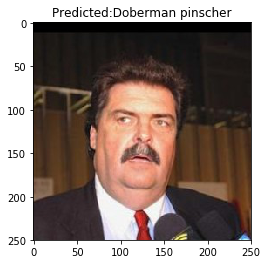

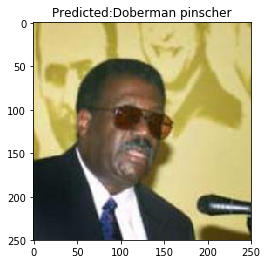

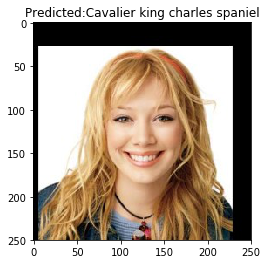

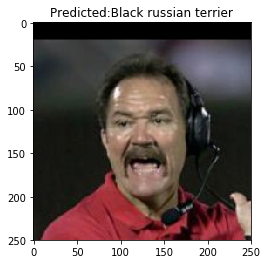

In [37]:
import random

# Try out the function
for image in random.sample(list(human_files_short), 4): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title=f"Predicted:{predicted_breed}")

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
        # check if image has juman faces:
    if (face_detector(img_path)):
        print("Human detected!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("You look like a breed of dog...")
        print(predicted_breed.upper())
    # check if image has dogs:
    elif dog_detector(img_path):
        print("Dog detected!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("Your breed is mostly ...")
        print(predicted_breed.upper())
    else:
        print("No dog or human face detected in the image.")
        display_image(img_path, title="...")
        print("Try another image!")
    print("\n")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. Fine tune the model to give better accuracy.
2. Convert this run_app function into an API to call from other program
3. Code can be made more modular
4. Different models with different optimizers can be benchmarked. It will take more time out of this project.

Human detected!


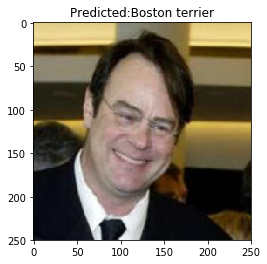

You look like a breed of dog...
BOSTON TERRIER


Human detected!


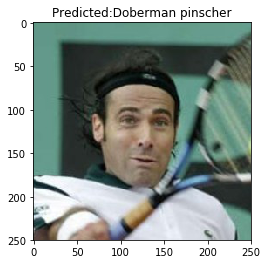

You look like a breed of dog...
DOBERMAN PINSCHER


Human detected!


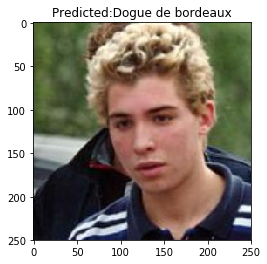

You look like a breed of dog...
DOGUE DE BORDEAUX


detected index : 243
Dog detected!


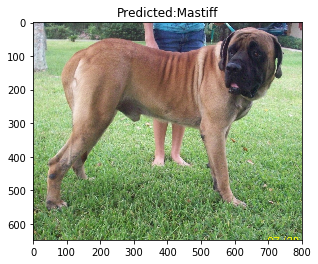

Your breed is mostly ...
MASTIFF


detected index : 243
Dog detected!


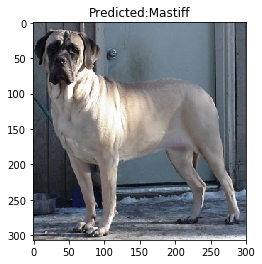

Your breed is mostly ...
MASTIFF


detected index : 243
Dog detected!


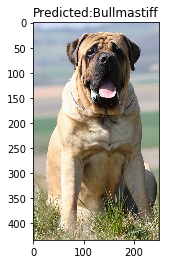

Your breed is mostly ...
BULLMASTIFF




In [39]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)